In [13]:
!pip install pmdarima

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import date
from datetime import datetime
from math import sqrt
import warnings
warnings.filterwarnings("ignore")


In [15]:
!pip install xlrd

In [28]:
data = pd.read_csv("/kaggle/input/wheat-prices-0-years/agrimarket_data_1724740500.csv")
data.head()

,month,value
0,2014-01-01,1711.22
1,2014-02-01,1697.11
2,2014-03-01,1647.10
3,2014-04-01,1552.83
4,2014-05-01,1540.28


In [29]:
data.tail()

,month,value
122,2024-03-01,2430.32
123,2024-04-01,2385.14
124,2024-05-01,2421.74
125,2024-06-01,2469.96
126,2024-07-01,2510.78


In [30]:
plt.figure(figsize=(8,5))
# plt.plot(data.index, data['value'])

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [31]:
stepwise_fit = auto_arima(data['value'], suppress_warnings=True)
stepwise_fit.summary()

n = len(data['value'])
print(n)
train_size = int(n * 0.80)
#train test split
train_set = data.iloc[:train_size]
test_set = data.iloc[train_size:]
print(len(train_set))
print(len(test_set))

127
101
26


MSE =  3788.209392619384
RMSE =  61.54843127667336


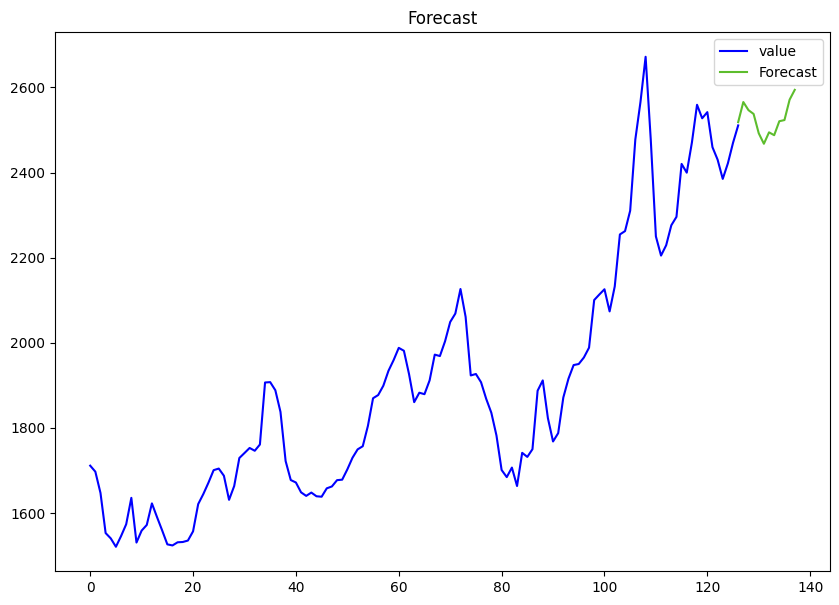

In [32]:
model = ARIMA(data['value'], order = (15,1,15))
model_fit = model.fit()
model_fit.summary()
#predict on test set
start_point = len(train_set)
end_point = len(train_set) + len(test_set) - 1
pred = model_fit.predict(start= start_point, end = end_point, type='levels').rename('ARIMA predictions')
# pred.plot(legend=True)
# test_set['Close'].plot(legend=True)
mse = mean_squared_error(pred, test_set['value'])
print("MSE = ",mse)
rmse = math.sqrt(mse)
print("RMSE = ",rmse)
#Future trend 
future = model_fit.predict(start= len(data)-1, end= len(data)+10, type='levels').rename("Forecast")
# print(future)
plt.figure(figsize=(10,7))
data['value'].plot(color = 'blue', legend=True)
# future.plot(legend=True, title=f"{sym} 50-Day Forecast")
flg = 0
if future[len(data) + 10] > future[len(data)]:
    flg = 1
if flg == 1:
    future.plot(color='#5dbd2d', legend=True, title="Forecast")
else:
    future.plot(color = 'red', legend=True, title="Forecast")


In [33]:
future

126    2518.517708
127    2565.717232
128    2546.690212
129    2537.703978
130    2492.296863
131    2467.647753
132    2494.525798
133    2487.791731
134    2520.603469
135    2523.378050
136    2571.235094
137    2594.334487
Name: Forecast, dtype: float64